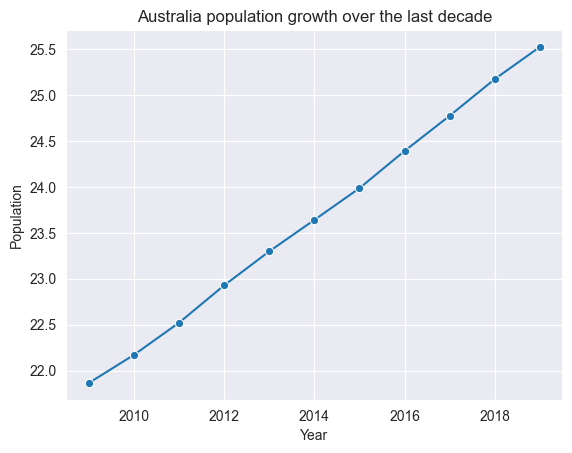

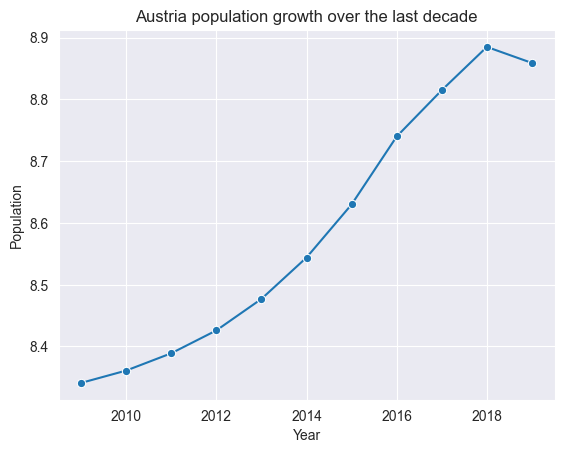

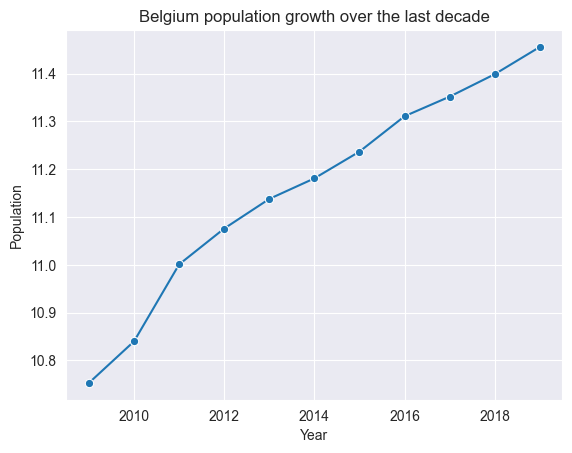

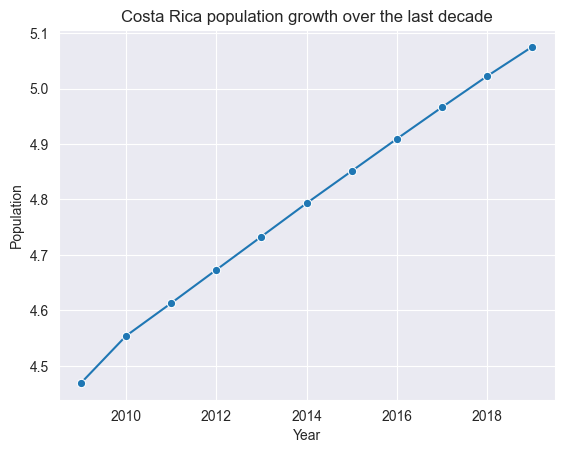

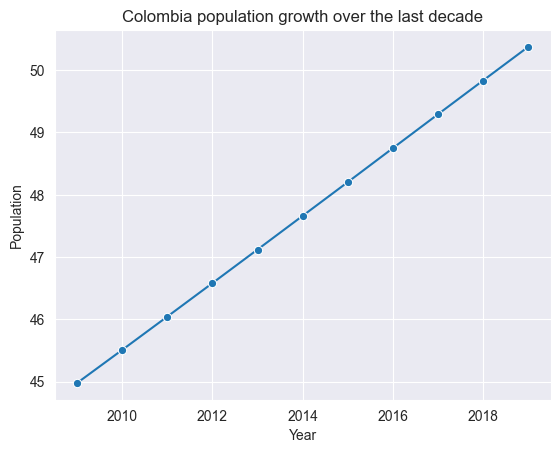

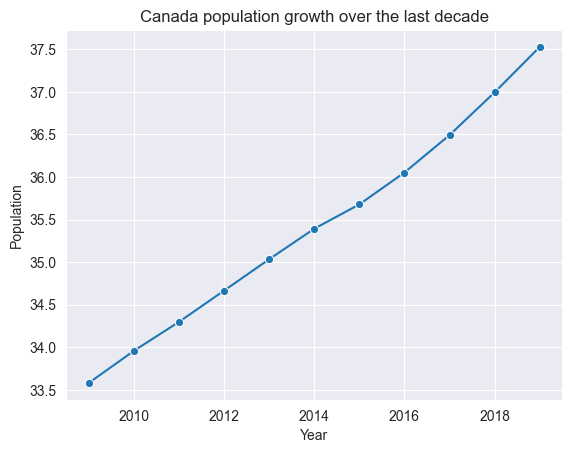

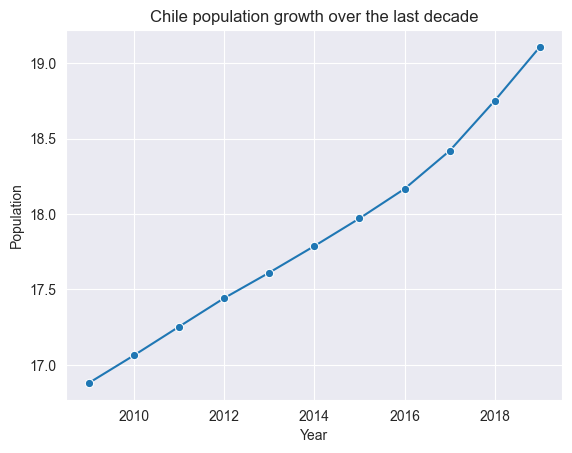

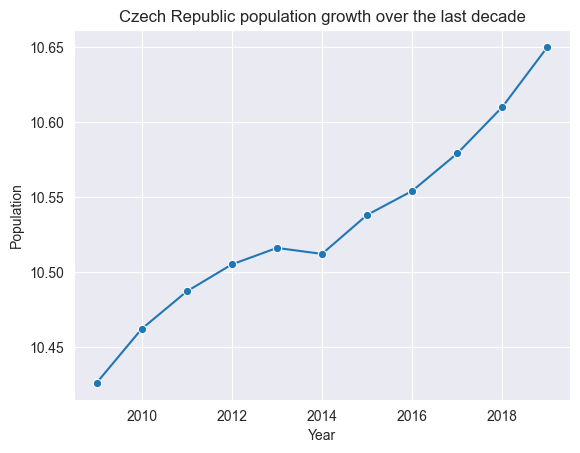

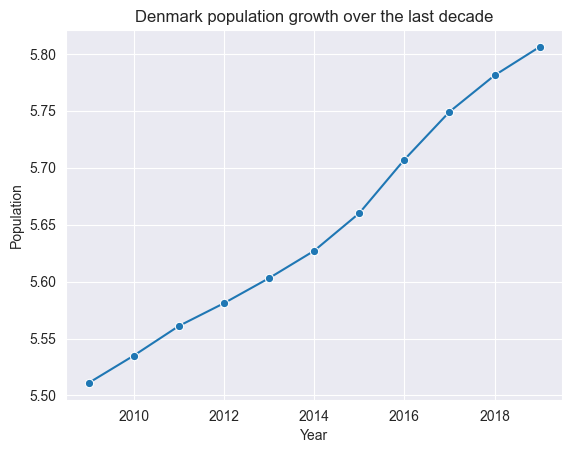

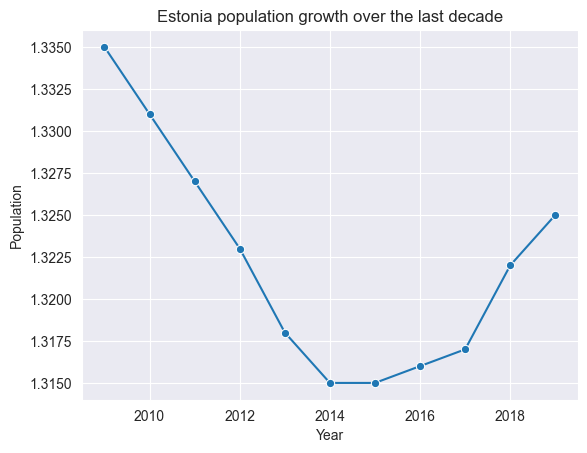

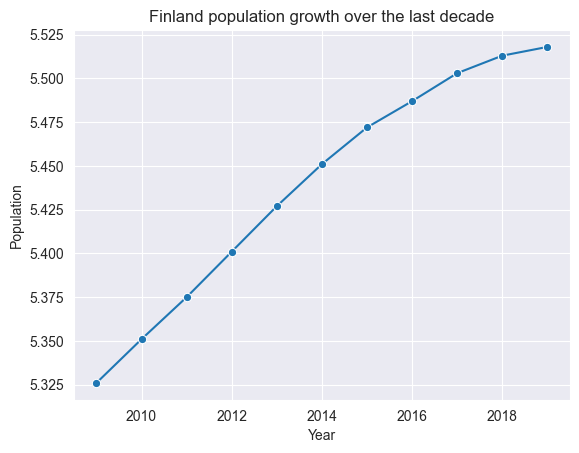

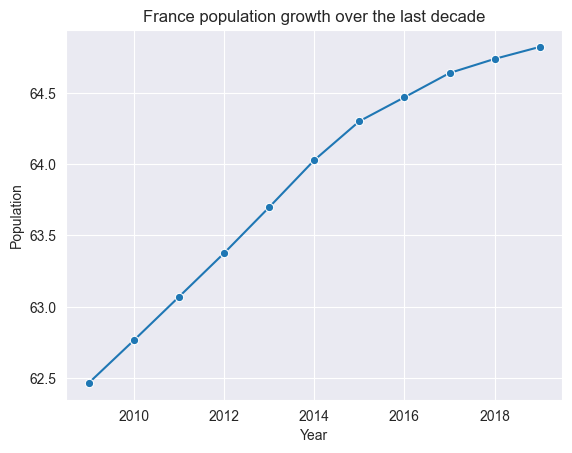

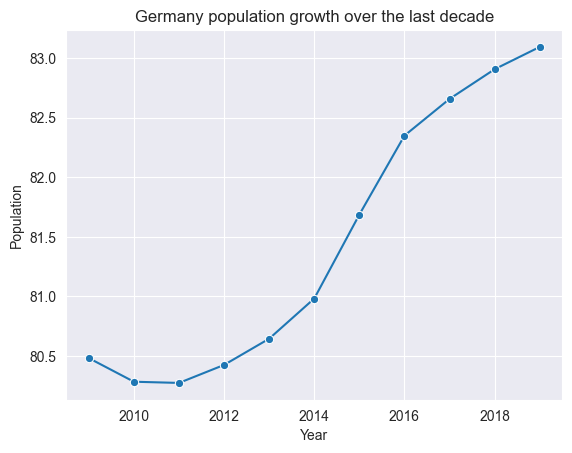

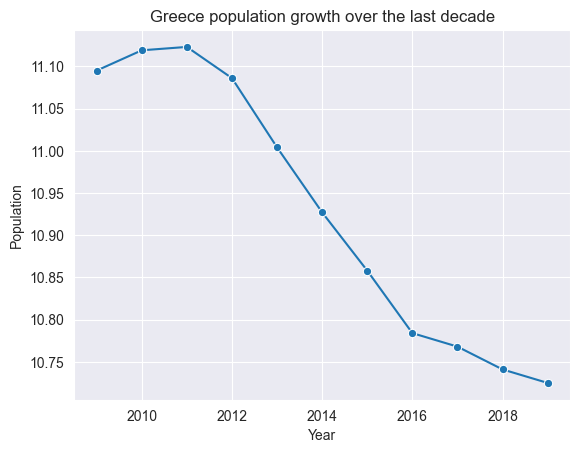

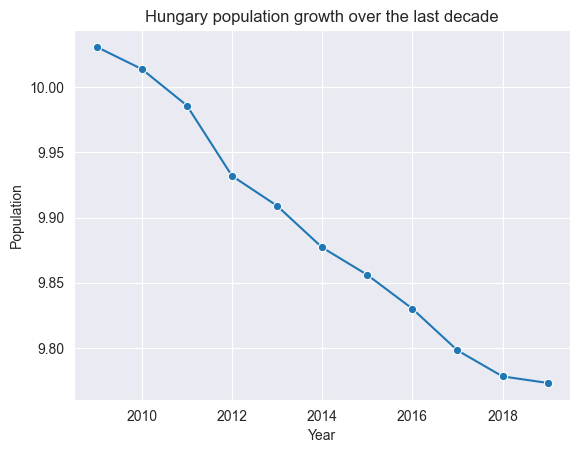

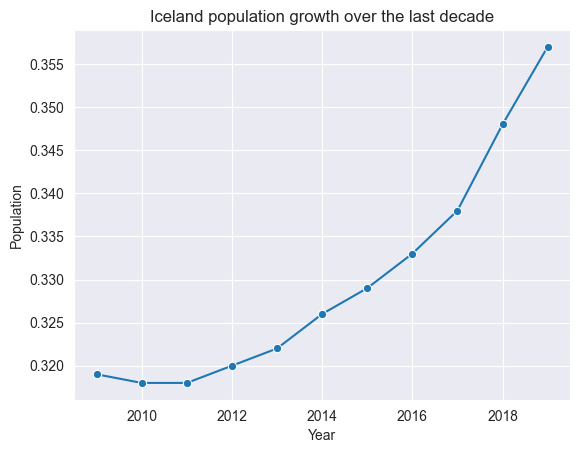

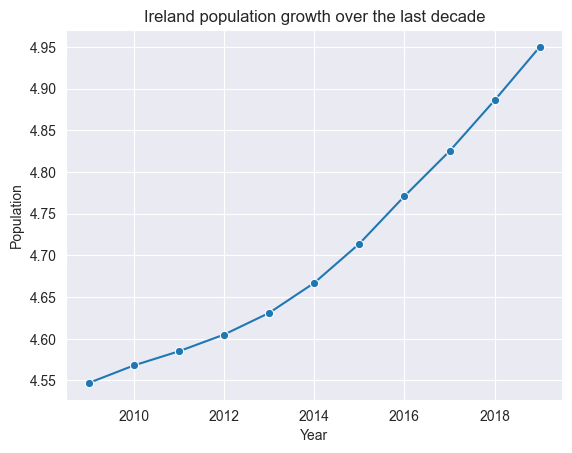

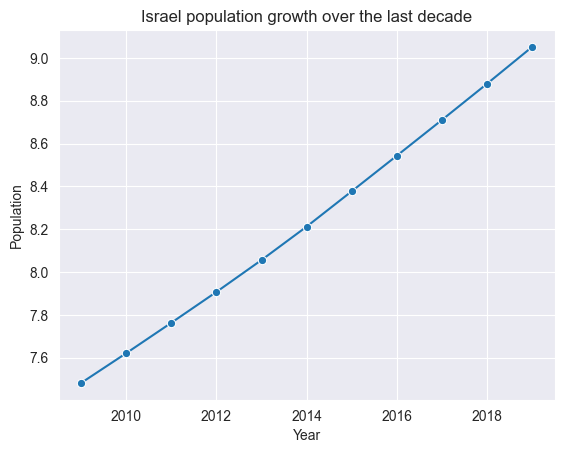

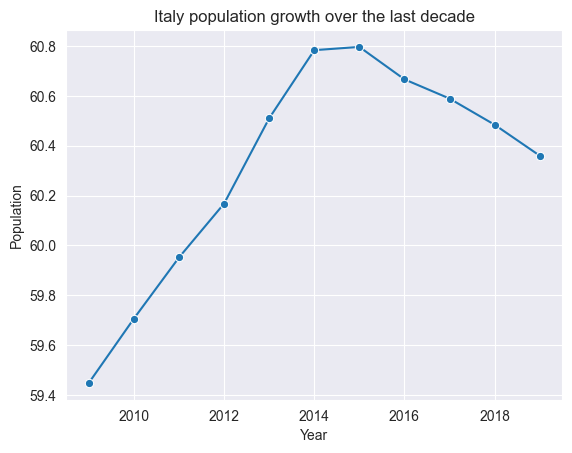

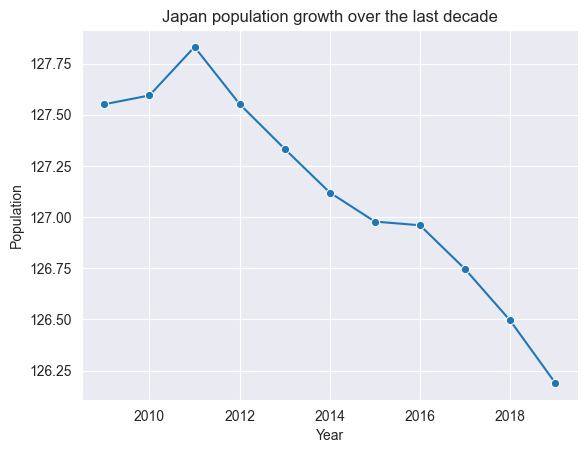

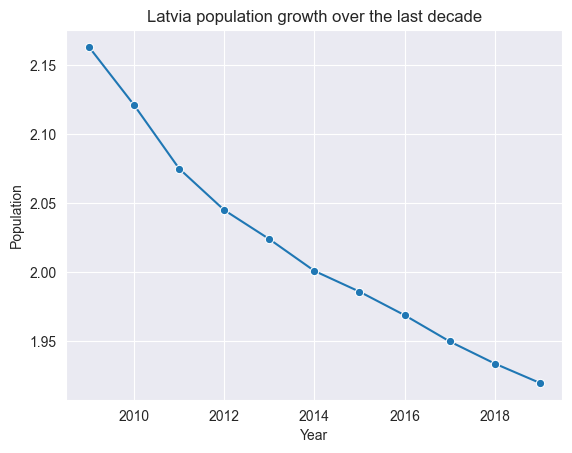

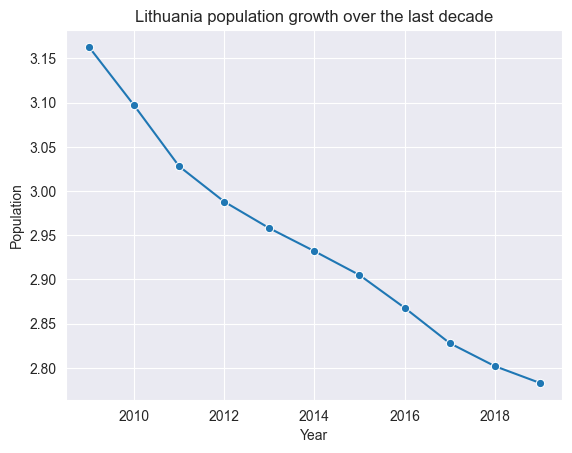

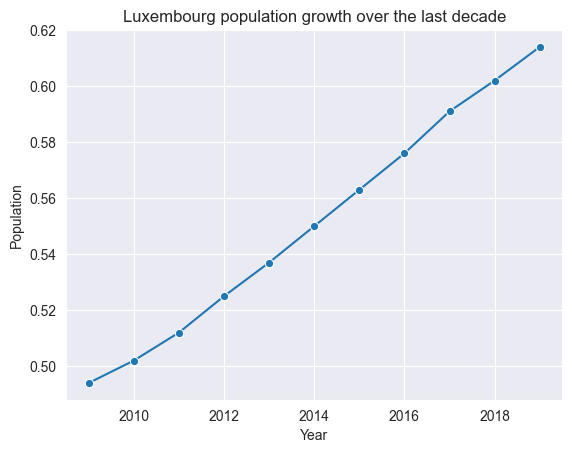

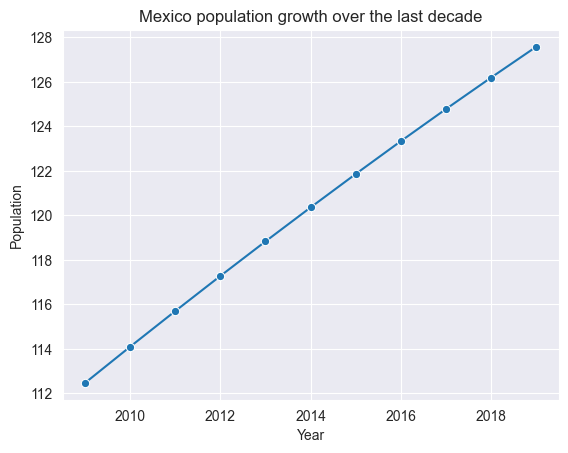

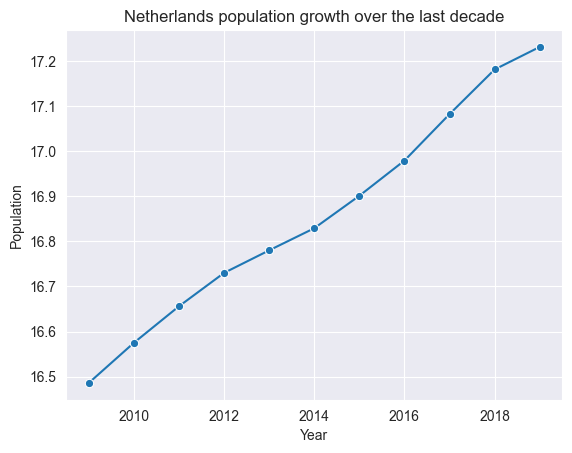

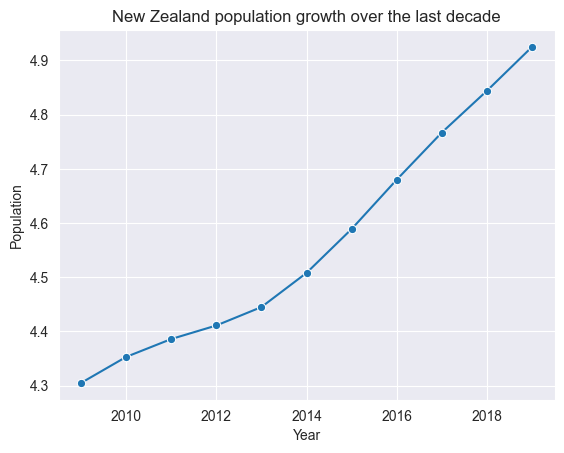

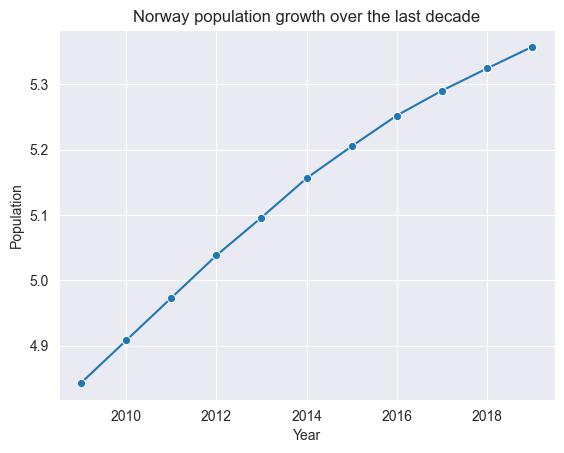

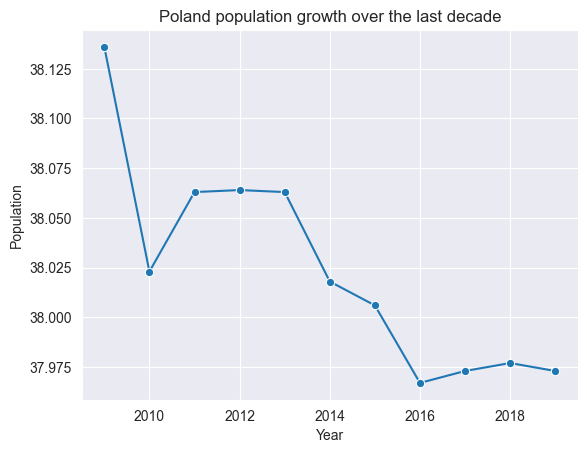

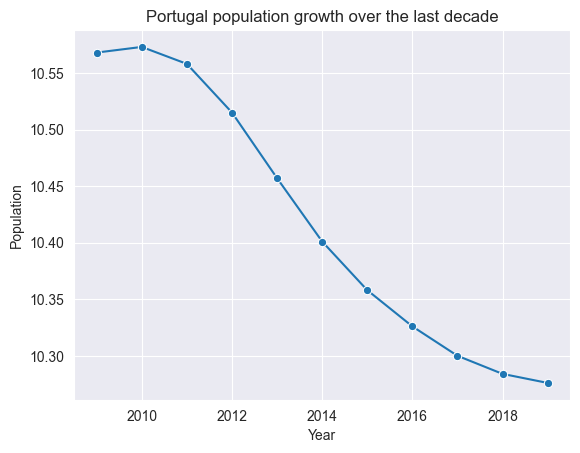

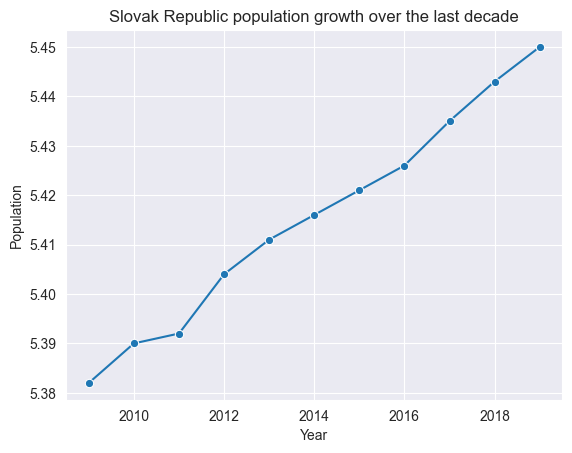

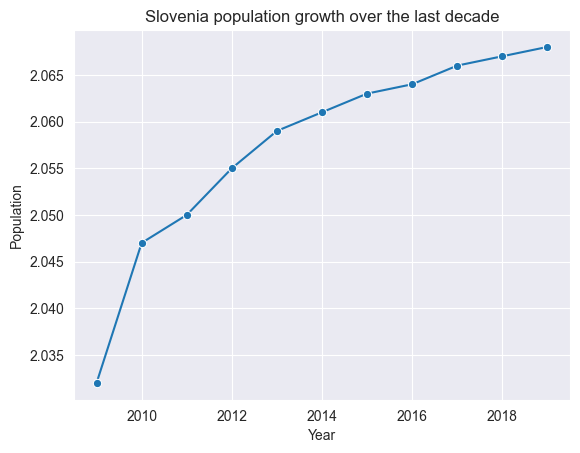

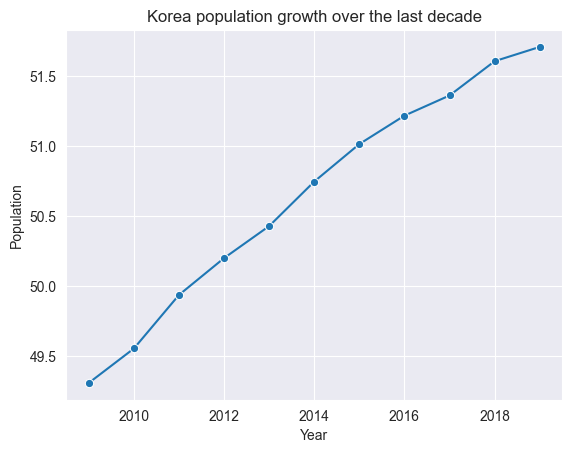

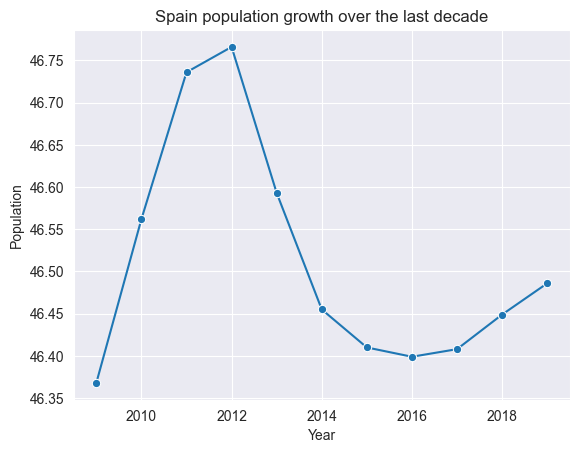

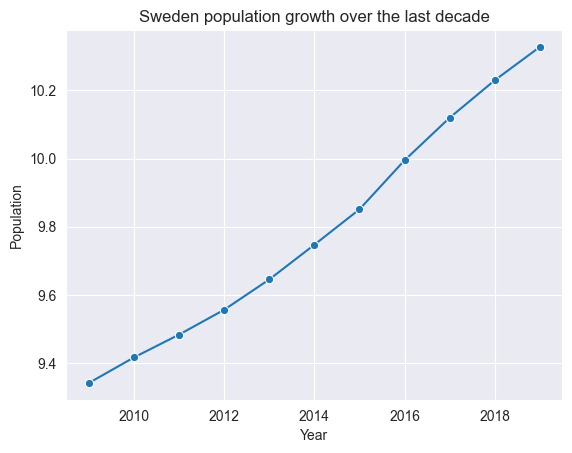

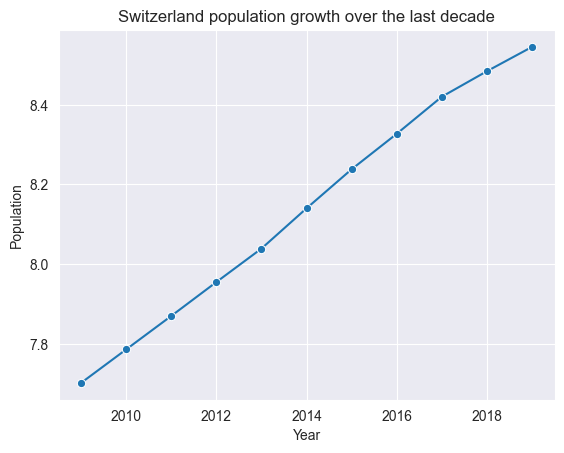

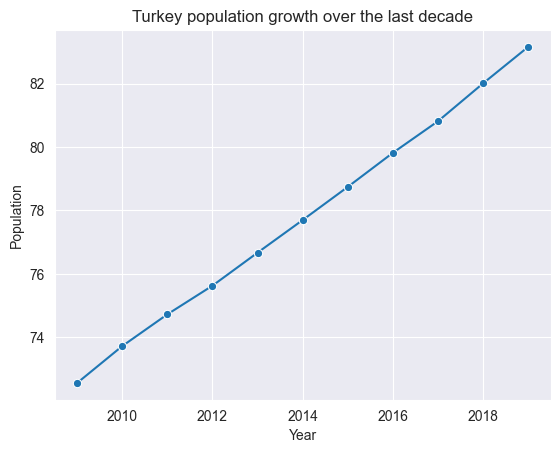

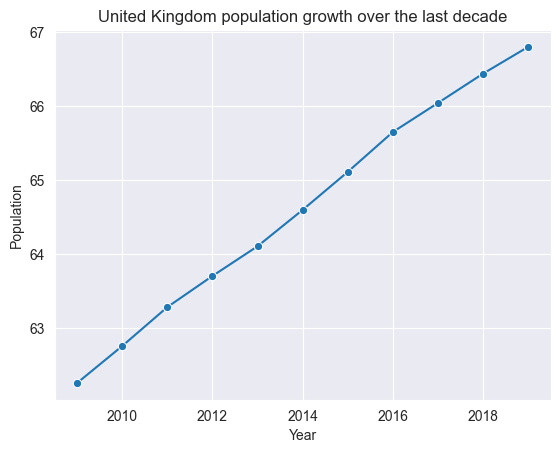

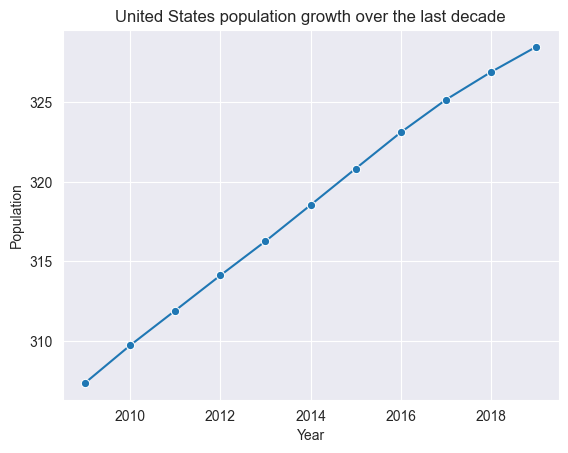

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Change working directory
new_directory = "C:\\Users\\Zygis\\Desktop\\AAI-Labs-projektas"
os.chdir(new_directory)

# Task 2
# Draw OECD countries "Population" growth over the last decade.

# Read the data
df = pd.read_excel("WEOOct2020all.xls", engine="xlrd")


# Function to read data from OECD JSON file and return OECD countries
def read_OECD(path):
    countries = []
    with open(path, "r") as json_file:
        data = json.load(json_file)
        for country in data:
            countries.append(country["country"])
    return countries


# Function to plot population growth of OECD countries from 2010 to 2019
def plot_population(df, country, year_start, year_end):
    sns.set_style("darkgrid")
    plot = sns.lineplot(data=df.loc[country, year_start:year_end], marker="o")

    plot.set_title(f"{country} population growth over the last decade")
    plot.set_xlabel("Year")
    plot.set_ylabel("Population")

    # Show the plot
    plt.show()


# Read OECD countries from JSON file
OECD = read_OECD("2-dalis\\oecd-countries-2023.json")

# Select rows where WEO subject code is LP (Population) and country is in OECD coutries list
df = df[(df["WEO Subject Code"] == "LP") & df["Country"].isin(OECD)]

# Determine decade start and end years for all countries
year_end = df["Estimates Start After"].value_counts().index[0].astype(int)
year_start = year_end - 10

# Set country name as index
df = df.set_index("Country")

# Select columns from 2010 to 2019
df = df.loc[:, year_start:year_end]

# Now we have a dataframe with OECD countries population from 2010 to 2019


# plot population growth rate of selected countries
for country in OECD:
    plot_population(df, country, year_start, year_end)